# L1 Neurons

## Neuron with 3 inputs

In [650]:
inputs = [1, 2, 3]
weights = [0.2, 0.8, -0.5]
bias = 2

output = ((inputs[0]*weights[0])
         +(inputs[1]*weights[1])
         +(inputs[2]*weights[2])
         + bias)

output

2.3

## Neuron with 4 inputs

In [651]:
inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2

output = ((inputs[0] * weights[0]) 
        + (inputs[1] * weights[1]) 
        + (inputs[2] * weights[2]) 
        + (inputs[3] * weights[3]) 
        +  bias)

output

4.8

### number of weights per neuron depending on the number of neurons in the previous layer or the number of input dimensions

## Layer of Neurons manuell

In [652]:
inputs = [1, 2, 3, 2.5]


weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]


biases = [2, 3, 0.5]


output = [[(inputs[0] * weights[0][0]) 
         + (inputs[1] * weights[0][1]) 
         + (inputs[2] * weights[0][2]) 
         + (inputs[3] * weights[0][3]) 
         + biases[0]],

          [(inputs[0] * weights[1][0]) 
         + (inputs[1] * weights[1][1]) 
         + (inputs[2] * weights[1][2]) 
         + (inputs[3] * weights[1][3]) 
         + biases[1]],

          [(inputs[0] * weights[2][0]) 
         + (inputs[1] * weights[2][1]) 
         + (inputs[2] * weights[2][2]) 
         + (inputs[3] * weights[2][3]) 
         + biases[2]]]
output

[[4.8], [1.21], [2.385]]

## Layer of Neurons loop

In [653]:
inputs = [1, 2, 3, 2.5]


weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]


biases = [2, 3, 0.5]

layer_outputs = []

for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input * weight
    neuron_output += neuron_bias
    layer_outputs.append(neuron_output)
print(layer_outputs)

[4.8, 1.21, 2.385]


# L2 Dot Product

In [654]:
import numpy as np
import torch

## Dot Product Rules

### for computing dot products avoid mixing between torch and numpy

### using pytorch --> torch.tensor() to create input data and torch.matmul() to compute dot product

### using numpy --> np.array() to create input data and np.dot() to compute dot product

### Check type using type() and dimensions using .shape for both

In [655]:
tens1 = torch.tensor([[2, 3, 4]])

tens2 = torch.tensor([[4, 3, 5], 
                      [3, 4, 2]])


tens3 = np.array([[2, 3, 4]])

tens4 = np.array([[4, 3, 5], 
                  [3, 4, 2]])


print(torch.matmul(tens1, tens2.T))
print(np.dot(tens3, tens4.T))


print(type(tens1), type(tens3))
print(tens1.shape, tens2.shape, tens3.shape, tens4.shape)

tensor([[37, 26]])
[[37. 26.]]
<class 'torch.Tensor'> <class 'numpy.ndarray'>
torch.Size([1, 3]) torch.Size([2, 3]) (1, 3) (2, 3)


In [656]:
v1 = torch.tensor([[1, 2, 3]])

v2 = torch.tensor([[2], 
                   [3], 
                   [4]])


m1 = torch.tensor([[3, 4, 5, 7], 
                   [4, 2, 5, 1],
                   [5, 1, 1, 3]])

m2 = torch.tensor([[5, 1, 2],
                   [5, 4, 8],
                   [7, 3, 5],
                   [4, 2, 1]])


v1v2 = torch.matmul(v1, v2)
v1m1 = torch.matmul(v1, m1)
v2v1 = torch.matmul(v2, v1)
m1m2 = torch.matmul(m1, m2)
m2v2 = torch.matmul(m2, v2)
m2m1 = torch.matmul(m2, m1)



print(f"Vector 1: {v1}\n\nSize V1: {v1.shape}\n")
print(f"Vector 2:\n{v2}\n\nSize V2: {v2.shape}\n")


print(f"Matrix 1:\n{m1}\n\nSize M1: {m1.shape}\n")
print(f"Matrix 2:\n{m2}\n\nSize M2: {m2.shape}")

print(f"\nV1 * V2 --> Result Size: {v1v2.shape}\nV1 * M1 --> Result Size: {v1m1.shape}\nV2 * V1 --> Result Size: {v2v1.shape}")
print(f"M1 * M2 --> Result Size: {m1m2.shape}\nM2 * V2 --> Result Size: {m2v2.shape}\nM2 * M1 --> Result Size: {m2m1.shape}")

Vector 1: tensor([[1, 2, 3]])

Size V1: torch.Size([1, 3])

Vector 2:
tensor([[2],
        [3],
        [4]])

Size V2: torch.Size([3, 1])

Matrix 1:
tensor([[3, 4, 5, 7],
        [4, 2, 5, 1],
        [5, 1, 1, 3]])

Size M1: torch.Size([3, 4])

Matrix 2:
tensor([[5, 1, 2],
        [5, 4, 8],
        [7, 3, 5],
        [4, 2, 1]])

Size M2: torch.Size([4, 3])

V1 * V2 --> Result Size: torch.Size([1, 1])
V1 * M1 --> Result Size: torch.Size([1, 4])
V2 * V1 --> Result Size: torch.Size([3, 3])
M1 * M2 --> Result Size: torch.Size([3, 3])
M2 * V2 --> Result Size: torch.Size([4, 1])
M2 * M1 --> Result Size: torch.Size([4, 4])


## Dot Product between Vector and Matrix from Array

In [657]:
inputs = [1, 2, 3, 2.5]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

outputs = []

inputs = np.array(inputs)
weights = np.array(weights)

neuron1 = np.dot(weights[0], inputs) + biases[0]
neuron2 = np.dot(weights[1], inputs) + biases[1]
neuron3 = np.dot(weights[2], inputs) + biases[2]

outputs.append((neuron1, neuron2, neuron3))
outputs

[(4.799999952316284, 1.2100000381469727, 2.384999990463257)]

## Dot Product between Vector and Matrix from Tensors

In [658]:
inputs = torch.tensor([[1, 2, 3, 2.5]])
weights = torch.tensor([[0.2, 0.8, -0.5, 1.0],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]])

biases = torch.tensor([2, 3, 0.5])

outputs = torch.matmul(inputs, weights.T) + biases

print(f"Inputs Size: {inputs.T.shape}")
print(f"Weights Size: {weights.shape}")
print(f"{weights.shape} * {inputs.T.shape} = {outputs.shape}\n")

print(f"{outputs[0]}")

Inputs Size: torch.Size([4, 1])
Weights Size: torch.Size([3, 4])
torch.Size([3, 4]) * torch.Size([4, 1]) = torch.Size([1, 3])

tensor([4.8000, 1.2100, 2.3850])


## Dot Product between Matrix and Matrix using arrays
#### mind using np.array to handle list for transposition

In [659]:
inputs = [[1, 2, 3, 2.5], 
          [2, 5, -1, 2], 
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

inputs = np.array(inputs)
weights = np.array(weights)
biases = np.array(biases)

outputs = np.dot(inputs, weights.T) + biases
outputs

array([[ 4.79999995,  1.21000004,  2.38499999],
       [ 8.9000001 , -1.80999994,  0.19999999],
       [ 1.41000003,  1.051     ,  0.02599999]])

## Dot Product between Matrix and Matrix using Tensors

In [660]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

weights = torch.tensor([[0.2, 0.8, -0.5, 1.0],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]])

biases = torch.tensor([2, 3, 0.5])

outputs = torch.matmul(inputs, weights.T) + biases
outputs

tensor([[ 4.8000,  1.2100,  2.3850],
        [ 8.9000, -1.8100,  0.2000],
        [ 1.4100,  1.0510,  0.0260]])

# L3 Multiple Hidden Layers manual forwardpass

In [661]:
inputs = [[1, 2, 3, 2.5], 
          [2, 5, -1, 2], 
          [-1.5, 2.7, 3.3, -0.8]]

weights1 = [[0.2, 0.8, -0.5, 1.0],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]]

biases1 = [2, 3, 0.5]

weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]

biases2 = [-1, 2, -0.5]

weights3 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13],
            [0.1, -0.14, 0.5]]

biases3 = [4, 1, 2, 3, 0.5, -3]

weights4 = [[0.1, -0.14, 0.5, -0.44, 0.73, -0.13],
            [-0.5, 0.12, -0.33, -0.44, 0.73, -0.13],
            [0.1, -0.14, 0.5, 0.5, -0.91, 0.26],
            [-0.5, 0.12, -0.33, -0.26, -0.27, 0.17],
            [-0.91, 0.26, -0.5, 0.1, -0.14, 0.5]]

biases4 = [3, 2, -3, 1, 3]

weights5 = [[0.12, -0.33, -0.44, 0.73, -0.13],
            [0.12, -0.33, -0.26, -0.27, 0.17]]

biases5 = [4, 3]

weights6 = [[-0.5, 0.12],
            [-0.5, 0.12],
            [-0.91, 0.26]]

biases6 = [3, 5, 2]

weights7 = [[-0.33, -0.44, 0.73],
            [-0.26, -0.27, 0.17],
            [-0.91, 0.26, -0.5],
            [0.1, -0.14, 0.5]]

biases7 = [2, 1.5, 4, 3]

weights8 = [[0.12, -0.33, -0.44, 0.73],
            [-0.91, 0.26, -0.5, 0.1],
            [0.5, -0.91, 0.26, -0.5]]

biases8 = [3, 1, -0.4]

weights9 = [[-0.44, 0.73, -0.13],
            [0.12, -0.33, -0.26],
            [-0.91, 0.26, -0.5],
            [0.1, -0.14, 0.5],
            [-0.33, -0.44, 0.73],
            [-0.91, 0.26, -0.5]]

biases9 = [4, 5, 3, 2, 5, 3]

weights10 = [[0.1, -0.14, 0.5, -0.91, 0.26, -0.5],
             [-0.91, 0.26, -0.5, 0.1, -0.14, 0.5],
             [0.1, -0.14, 0.5, -0.33, -0.44, 0.73],
             [0.1, -0.14, 0.5, 0.5, -0.91, 0.26],
             [-0.5, 0.12, -0.33, -0.5, 0.12, -0.33],
             [-0.91, 0.26, -0.5, 0.1, -0.14, 0.5],
             [0.1, -0.14, 0.5, -0.14, 0.5, -0.33],
             [-0.14, 0.5, -0.91, 0.26, -0.14, 0.5]]

biases10 = [3, 2, 3, 4, 2, -4, 1, 5]


inputs = np.array(inputs)
weights1 = np.array(weights1)
biases1 = np.array(biases1)
weights2 = np.array(weights2)
biases2 = np.array(biases2)
weights3 = np.array(weights3)
biases3 = np.array(biases3)
weights4 = np.array(weights4)
biases4 = np.array(biases4)
weights5 = np.array(weights5)
biases5 = np.array(biases5)
weights6 = np.array(weights6)
biases6 = np.array(biases6)
weights7 = np.array(weights7)
biases7 = np.array(biases7)
weights8 = np.array(weights8)
biases8 = np.array(biases8)
weights9 = np.array(weights9)
biases9 = np.array(biases9)
weights10 = np.array(weights10)
biases10 = np.array(biases10)


output1 = np.dot(inputs, weights1.T) + biases1
output2 = np.dot(output1, weights2.T) + biases2
output3 = np.dot(output2, weights3.T) + biases3
output4 = np.dot(output3, weights4.T) + biases4
output5 = np.dot(output4, weights5.T) + biases5
output6 = np.dot(output5, weights6.T) + biases6
output7 = np.dot(output6, weights7.T) + biases7
output8 = np.dot(output7, weights8.T) + biases8
output9 = np.dot(output8, weights9.T) + biases9
output10 = np.dot(output9, weights10.T) + biases10


print(f"Input to 1st hidden Layer:\n{inputs}\n{inputs.shape}\n")
print(f"Output1 from 1st hidden Layer:\n{output1}\n{output1.shape}\n\nBecomes Input for 2nd hidden Layer\n\n")
print(f"Output2 from 2nd hidden Layer:\n{output2}\n{output2.shape}\n\nBecomes Input for 3rd hidden Layer\n\n")
print(f"Output3 from 3rd hidden Layer:\n{output3}\n{output3.shape}\n\nBecomes Input for 4th hidden Layer\n\n")
print(f"Output4 from 4th hidden Layer:\n{output4}\n{output4.shape}\n\nBecomes Input for 5th hidden Layer\n\n")
print(f"Output5 from 5th hidden Layer:\n{output5}\n{output5.shape}\n\nBecomes Input for 6th hidden Layer\n\n")
print(f"Output6 from 6th hidden Layer:\n{output6}\n{output6.shape}\n\nBecomes Input for 7th hidden Layer\n\n")
print(f"Output7 from 7th hidden Layer:\n{output7}\n{output7.shape}\n\nBecomes Input for 8th hidden Layer\n\n")
print(f"Output8 from 8th hidden Layer:\n{output8}\n{output8.shape}\n\nBecomes Input for 9th hidden Layer\n\n")
print(f"Output7 from 9th hidden Layer:\n{output9}\n{output9.shape}\n\nBecomes Input for 10th hidden Layer\n\n")
print(f"Output8 from 10th hidden Layer:\n{output10}\n{output10.shape}\n\nBecomes Input for 11th hidden Layer\n\n")


Input to 1st hidden Layer:
[[ 1.   2.   3.   2.5]
 [ 2.   5.  -1.   2. ]
 [-1.5  2.7  3.3 -0.8]]
(3, 4)

Output1 from 1st hidden Layer:
[[ 4.79999995  1.21000004  2.38499999]
 [ 8.9000001  -1.80999994  0.19999999]
 [ 1.41000003  1.051       0.02599999]]
(3, 3)

Becomes Input for 2nd hidden Layer


Output2 from 2nd hidden Layer:
[[ 0.50310004 -1.04184985 -2.03874993]
 [ 0.24339998 -2.73320007 -5.76329994]
 [-0.99314     1.41254002 -0.35655001]]
(3, 3)

Becomes Input for 3rd hidden Layer


Output3 from 3rd hidden Layer:
[[ 3.17679399  1.29621547  1.28312308  3.29621547 -0.21687692 -3.82320601]
 [ 1.52533793  2.45220494  0.64689696  4.45220494 -0.85310304 -5.47466207]
 [ 3.5246554   1.78373629  3.51448727  3.78373629  2.01448727 -3.4753446 ]]
(3, 6)

Becomes Input for 4th hidden Layer


Output4 from 4th hidden Layer:
[[ 2.6661326  -0.96791983 -1.37079704 -2.30468607 -1.74704695]
 [ 1.26264429 -0.55190969 -1.28831232 -1.53980827 -0.24660873]
 [ 5.1175127  -0.45053363 -1.98491871 -3.8265519

## Input batch with 3 rows (embeddings) and 4 columns (embedding dimensions)

### --> Layer 1 Size 3 Neurons, 4 weights, 3 biases --> 3 x 4 * 4 x 3 with weights transposed -> 3 x 3

### --> Layer 2 Size 3 Neurons, 3 weights, 3 biases --> 3 x 3 * 3 x 3 with weights transposed -> 3 x 3

### --> Layer 3 Size 6 Neurons, 3 weights, 6 biases --> 3 x 3 * 3 x 6 with weights transposed -> 3 x 6

### --> Layer 4 Size 5 Neurons, 6 weights, 5 biases --> 3 x 6 * 6 x 5 with weights transposed -> 3 x 5

### --> Layer 5 Size 2 Neurons, 5 weights, 2 biases --> 3 x 5 * 5 x 2 with weights transposed -> 3 x 2

### --> Layer 6 Size 3 Neurons, 2 weights, 3 biases --> 3 x 2 * 2 x 3 with weights transposed -> 3 x 3

### --> Layer 7 Size 4 Neurons, 3 weights, 4 biases --> 3 x 3 * 3 x 4 with weights transposed -> 3 x 4 

### --> Layer 8 Size 3 Neurons, 4 weights, 3 biases --> 3 x 4 * 4 x 3 with weights transposed -> 3 x 3

### --> Layer 9 Size 6 Neurons, 3 weights, 6 biases --> 3 x 3 * 3 x 6 with weights transposed -> 3 x 6

### --> Layer 10 Size 8 Neurons, 6 weights, 8 biases --> 3 x 6 * 6 x 8 with weights transposed -> 3 x 8

## to avoid transposing the weights may be passed in columns instead of rows

# L4 Dense Layer Class

### ! pip install nnfs

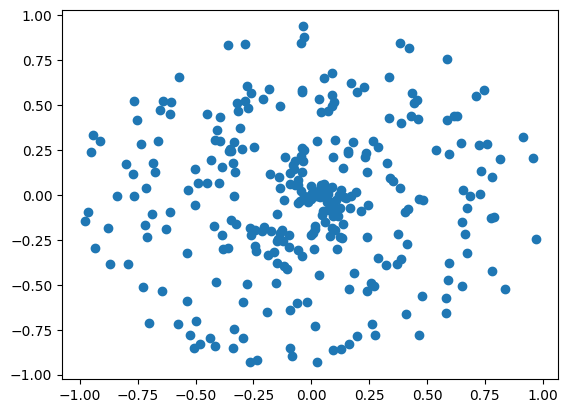

In [662]:
from nnfs.datasets import spiral_data
import nnfs
nnfs.init()
import matplotlib.pyplot as plt

X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

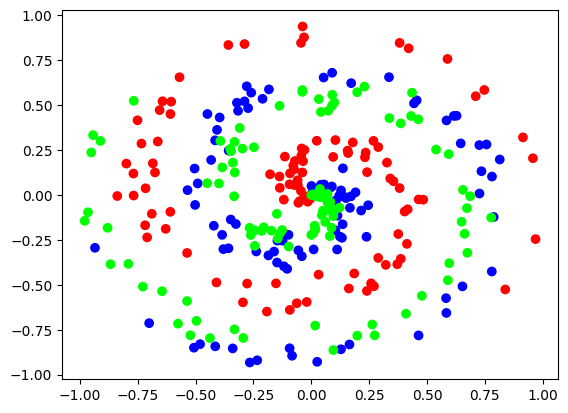

In [663]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
plt.show()

In [664]:
X.shape, y.shape

((300, 2), (300,))

### random array with values which represent gaussian distribution 
### have mean of 0 and variance of 1

In [665]:
np.random.seed(50)
arr = np.random.randn(100, 100)
mean = arr.mean()
variance = arr.var()

print(mean)
print(variance)


0.01487915
0.98592794


### Shape of inputs to the neural network are 300 2-dimensional data points specified by (x, y)-Coordinates 

#### --> each (x, y) Coordinate is assigned input (x1, x2) x1 being the 1st dimension and x2 being the 2nd dimension

### n_inputs specifies the input dimension which is given by coordinates in 2D-Coordinate System (x, y) 
### depending on the number of neurons in each layer the respective input weights will be according to the number of neurones in the previous layer as each neuron branches out to each neuron of the present layer holding 1 weight value

In [666]:
class LayerDense4:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

dense_layer1 = LayerDense4(2, 3)
dense_layer1.forward(X)
print(dense_layer1.output.shape)

(300, 3)


## determine weight matrix size
### 2 inputs be seen as the dimension of the input vector or matrix
### 3 outpus be seen as the 3 neurons the input is going towards

In [667]:
weight_matrix = torch.randn([2, 3])
print(f"Input shape: {X.shape}")
print(f"{X.shape} * {weight_matrix.shape} = {dense_layer1.output.shape}")
print(f"Output shape: {dense_layer1.output.shape}")

Input shape: (300, 2)
(300, 2) * torch.Size([2, 3]) = (300, 3)
Output shape: (300, 3)


# L5 Array Summation and Broadcasting Rules

## arguments *axis* and *keepdims*

### np.sum(x) vs. np.sum(x, axis=None) vs. np.sum(x, axis=0) vs np.sum(x, axis=1)

### input array with 2 dimensions --> Results 1 dimensional Vector

In [668]:
example = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])

print(f"Return the overall sum of all elements in the matrix: {np.sum(example)}")
print(f"Return the overall sum of all elements in the matrix: {np.sum(example, axis=None)}")
print(f"Returns the sum of the 0th axis: {np.sum(example, axis=0)} --> along the columns (across the rows)")
print(f"Returns the sum of the 1st axis: {np.sum(example, axis=1)} --> along the rows (across the columns)")
print(f"Result shapes: {np.sum(example, axis=0).shape}, {np.sum(example, axis=1).shape} from {example.shape}")

Return the overall sum of all elements in the matrix: 45
Return the overall sum of all elements in the matrix: 45
Returns the sum of the 0th axis: [12 15 18] --> along the columns (across the rows)
Returns the sum of the 1st axis: [ 6 15 24] --> along the rows (across the columns)
Result shapes: (3,), (3,) from (3, 3)


## use of keepdims=True demonstrated, returns result with respect to the original dimensions within the Matrix

### input array with 2 dimaensions --> Results 2 dimensional Vector using keepdims=True

In [669]:
array1 = np.array([[1, 2, 3],
                     [4, 5, 6],
                     [7, 8, 9]])

print(f"Summing up along the columns with axis=0: {np.sum(array1, axis=0, keepdims=True)}")
print(f"Summing up along the rows with axis=1:\n{np.sum(array1, axis=1, keepdims=True)}")
print(f"{np.sum(array1, axis=0, keepdims=True).shape}, {np.sum(array1, axis=1, keepdims=True).shape}, {array1.shape}")

Summing up along the columns with axis=0: [[12 15 18]]
Summing up along the rows with axis=1:
[[ 6]
 [15]
 [24]]
(1, 3), (3, 1), (3, 3)


## Broadcasting rules in python

### steps to check broadcastibility

In [670]:
array2 = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

array3 = np.array([[1],
                   [2],
                   [3]])


print(f"{array2.shape}\n{array3.shape}")


(3, 3)
(3, 1)


#### in broadcasting python extends the 2nd dimension of the 2nd tensor to equal the 2nd dmension of the 1st tensor by copying the existing column n times 
#### makes the tensors eligible for addition operation

### dimensions as shown right above: 
### --> scan dimension from left 
### --> dimension must either be equal , one of the dimensions must be 1 , or one that does not exist

## --> pair of dimensions satisfy the 3 rules 

### take 3 and 1 (2nd dimensions) --> one of the dimensions is 1 (2nd rule SATISFIED)
### take 3 and 3 (1st dimensions) --> both dimensions are equel (1st rule SATISFIED)

## --> the two arrays are broadcastable

### checking on 3rd vector 1 x 3

In [671]:
array2 = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

array3 = np.array([[1],
                   [2],
                   [3]])

array4 = np.array([[1, 2, 3]])

print(f"{array2.shape}\n{array3.shape}\n{array4.shape}")

(3, 3)
(3, 1)
(1, 3)


## checking on 1st and 3rd

### --> 2nd dimension are equal 3 = 3
### --> 1st dimension one of them is 1 

## --> broadcasting rules satisfied

### similar to before the first dimension of tensor 4 is extended to match the 1st dimension of tensor 2


## in broadcasting the initial shape of the array is maintained by adding copies of a single vector (across columns or across rows) in order to match the dimension of another tensor which enables summation of 2 tensors with different shapes

### checking broadcastibility with missing dimension 

In [672]:
array5 = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

array6 = np.array([1, 2, 3])

array7 = array5 + array6

print(f"Size of 2-dimensional array: {array5.shape}")
print(f"Size of 1-dimensional array: {array6.shape} deliberatly no second dimension")
print(f"Row Vector Array 6 is extended and added to each row of Array 5 resulting in\n{array7}")

Size of 2-dimensional array: (3, 3)
Size of 1-dimensional array: (3,) deliberatly no second dimension
Row Vector Array 6 is extended and added to each row of Array 5 resulting in
[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]]


### subtract the max value of each row from each row value using PyTorch

In [673]:
maxvals = []
for i, row in enumerate(array7):
    max_i = max(array7[i])
    maxvals.append(max_i)

maxvals = torch.tensor(maxvals).unsqueeze(dim=-1)
array7 = torch.tensor(array7)
results = array7 - maxvals

print(array7, array7.shape)
print(maxvals, maxvals.shape)
print(results)



tensor([[ 2,  4,  6],
        [ 5,  7,  9],
        [ 8, 10, 12]]) torch.Size([3, 3])
tensor([[ 6],
        [ 9],
        [12]]) torch.Size([3, 1])
tensor([[-4, -2,  0],
        [-4, -2,  0],
        [-4, -2,  0]])


### subtract the max value of each row from each row value using numpy

### Case 1 and Case 2 notice the usage of keepdims parameter and how it affects the result

### only if keepdims is set to true the result will be retained as a column vector otherwise it will be returned as a row vector which would lead to wrong result when subtracting the max values from each row from the elements of that same row

In [674]:
array7 = np.array(array7)
case1 = array7 - np.max(array7, axis=1)
case2 = array7 - np.max(array7, axis=1, keepdims=True)

print(array7)
print(case1)
print(case2)

[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]]
[[-4 -5 -6]
 [-1 -2 -3]
 [ 2  1  0]]
[[-4 -2  0]
 [-4 -2  0]
 [-4 -2  0]]


### subtracting the max values of each column from all elements in that same column, in this case the keepdims parameter does not make a difference 

In [675]:
case1 = array7 - np.max(array7, axis=0)
case2 = array7 - np.max(array7, axis=0, keepdims=True)

print(array7)
print(case1)
print(case2)

[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]]
[[-6 -6 -6]
 [-3 -3 -3]
 [ 0  0  0]]
[[-6 -6 -6]
 [-3 -3 -3]
 [ 0  0  0]]


In [676]:
array8 = [[1, 2, 3], 
          [4, 5, 6], 
          [7, 8, 9]]

print(array8)
print(np.sum(array8))

print(np.sum(array8, axis=0))
print(np.sum(array8, axis=0).shape)

print(np.sum(array8, axis=1))
print(np.sum(array8, axis=1).shape)

print(np.sum(array8, axis=0, keepdims=True))
print(np.sum(array8, axis=0, keepdims=True).shape)

print(np.sum(array8, axis=1, keepdims=True))
print(np.sum(array8, axis=1, keepdims=True).shape)

print(np.max(array8, axis=0))
print(np.max(array8, axis=1))

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
45
[12 15 18]
(3,)
[ 6 15 24]
(3,)
[[12 15 18]]
(1, 3)
[[ 6]
 [15]
 [24]]
(3, 1)
[7 8 9]
[3 6 9]


# L6 Neural Network Activation Functions

### implementing non-linearities

In [677]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
outputs = np.maximum(0, inputs)
print(outputs)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


### each negative input value is set to 0

In [678]:
class ActivationRelu6:
    
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

### computing softmax activation function by first finding maximum row values and subtract them from the other values along the row --> to prevent values from getting too large

### finding probabilities by deviding the result by the sum of all exponential values in the row

## Steps for implementig softmax

#### find maximum values of each row
#### subtract maximum value from each element of the respective row
#### apply exponential function to each row element
#### devide each element by the sum of all exponential values of the particular row

In [679]:
inputs = [[1, 2, 3, 2.5],
          [2, 5, -1, 2],
          [-1.5, 2.7, 3.3, -0.8]]

max_values = np.max(inputs, axis=1, keepdims=True)
sub_max = inputs - max_values
exp_values = np.exp(sub_max)
probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
np.sum(probabilities, axis=1)

print(f"Maximum Values of each row:\n{max_values}\n")
print(f"Elements after Maximum values subtraction:\n{sub_max}\n")
print(f"Exponential Values:\n{exp_values}\n")
print(f"Probabilities after devidung exponential values with their respective sum along the row:\n{probabilities}")

Maximum Values of each row:
[[3. ]
 [5. ]
 [3.3]]

Elements after Maximum values subtraction:
[[-2.  -1.   0.  -0.5]
 [-3.   0.  -6.  -3. ]
 [-4.8 -0.6  0.  -4.1]]

Exponential Values:
[[0.13533528 0.36787944 1.         0.60653066]
 [0.04978707 1.         0.00247875 0.04978707]
 [0.00822975 0.54881164 1.         0.01657268]]

Probabilities after devidung exponential values with their respective sum along the row:
[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]
 [0.00522984 0.34875873 0.63547983 0.0105316 ]]


In [680]:
class ActivationSoftmax6:
    
    def forward(self, inputs):
        max_values = np.max(inputs, axis=1, keepdims=True)
        sub_max = inputs - max_values
        exp_values = np.exp(sub_max)
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output =  probabilities
        return self.output

In [681]:
x = torch.tensor([[21, 14, 25],
                  [3, 2, 6],
                  [21, 10, 7]]).numpy()

softtest = ActivationSoftmax6()
output1 = softtest.forward(x)
print(f"Output Tensor:\n{output1}\n")
print(f"Row sums:\n{np.sum(output1, axis=1, keepdims=True)}")


Output Tensor:
[[1.79859150e-02 1.64010315e-05 9.81997684e-01]
 [4.66126226e-02 1.71478255e-02 9.36239552e-01]
 [9.99982467e-01 1.67014080e-05 8.31514140e-07]]

Row sums:
[[1.]
 [1.]
 [1.]]


In [682]:
X, y = spiral_data(samples=100, classes=3)

dense1 = LayerDense4(2, 3)
activation1 = ActivationRelu6()
dense2 = LayerDense4(3, 3)
activation2 = ActivationSoftmax6()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
print(activation2.output.shape)
print(activation2.output[1])
print(activation2.output[1].sum())


(300, 3)
[0.3333333  0.33333325 0.33333343]
1.0


# L7 Coding Forward Pass

## recap on Layer Dense, Relu Activation and Softmax Activation

### steps of applying softmax function

# 1. Step initialize random tensor 

In [683]:
np.random.seed(50)
my_tensor = np.random.rand(4, 5)
my_tensor

array([[0.49460165, 0.2280831 , 0.25547392, 0.39632991, 0.3773151 ],
       [0.99657423, 0.4081972 , 0.77189399, 0.76053669, 0.31000935],
       [0.3465412 , 0.35176482, 0.14546686, 0.97266468, 0.90917844],
       [0.5599571 , 0.31359075, 0.88820004, 0.67457307, 0.39108745]])

## 2. Step find the maximum value in each row and return it as a column vector

In [684]:
max_vals = np.max(my_tensor, axis=-1, keepdims=True)
print(max_vals)

[[0.49460165]
 [0.99657423]
 [0.97266468]
 [0.88820004]]


## 3. Step subtract the maximum value of each row from all elements in that row

In [685]:
sub_vals = my_tensor - max_vals
print(sub_vals)

[[ 0.         -0.26651854 -0.23912772 -0.09827174 -0.11728655]
 [ 0.         -0.58837703 -0.22468024 -0.23603754 -0.68656488]
 [-0.62612348 -0.62089987 -0.82719783  0.         -0.06348625]
 [-0.32824293 -0.57460929  0.         -0.21362697 -0.49711259]]


## 4. Step take the exponent of the scaled row elements 

In [686]:
exp_vals = np.exp(sub_vals)
exp_vals

array([[1.        , 0.7660418 , 0.78731432, 0.90640257, 0.88933032],
       [1.        , 0.55522767, 0.7987716 , 0.78975102, 0.50330201],
       [0.53466041, 0.53746058, 0.43727288, 1.        , 0.93848703],
       [0.72018804, 0.56292477, 1.        , 0.8076496 , 0.60828449]])

## 5. Step divide each row element by the sum of all exponential values in the row

In [687]:
div_vals = exp_vals / np.sum(exp_vals, axis=-1, keepdims=True)
div_vals

array([[0.22993321, 0.17613845, 0.18102971, 0.20841205, 0.20448658],
       [0.27419404, 0.15224012, 0.21901841, 0.21654502, 0.13800241],
       [0.15506928, 0.15588142, 0.12682366, 0.29003322, 0.27219241],
       [0.19469557, 0.15218103, 0.27033991, 0.21833992, 0.16444357]])

## ReCreating test data

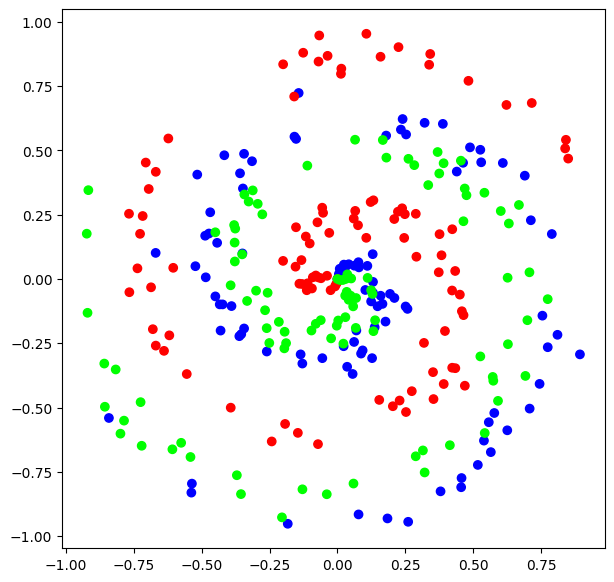

In [688]:
X, y = spiral_data(samples=100, classes=3)
X.shape, y.shape
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
plt.show()

In [689]:
class LayerDense7:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        return self.output

In [690]:
class ReluActivation7:

    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        return self.output

In [691]:
class SoftmaxActivation7:

    def forward(self, inputs):
        max_vals = np.max(inputs, axis=-1, keepdims=True)
        sub_vals = inputs - max_vals
        exp_vals = np.exp(sub_vals)
        self.output = exp_vals / np.sum(exp_vals, axis=-1, keepdims=True)
        return self.output

In [692]:
dense_layer1 = LayerDense7(X.shape[-1], 3)
output1 = dense_layer1.forward(X)
print(output1.shape)

(300, 3)


In [693]:
activation1 = ReluActivation7()
output2 = activation1.forward(output1)
print(output2.shape)

(300, 3)


In [694]:
layer_dense2 = LayerDense7(output2.shape[-1], 3)
output3 = layer_dense2.forward(output2)
print(output3.shape)

(300, 3)


In [695]:
activation2 = SoftmaxActivation7()
output4 = activation2.forward(output3)
print(output4[4])
print(output4[4].sum())
print(output4.shape)

[0.33333418 0.33333296 0.33333284]
0.99999994
(300, 3)


### softmax probabilities add up to 1 along the dimensions (rows) and give indication in terms of percentages with what probability the input coordinade belongs to the 1st class (red) the 2nd class (yellow) or the 3rd class (blue)

# L8 Cross Entropy Loss 

## X Dataset represents the 300 dots which 100 of them belong to 1 of the 3 classes

In [696]:
samples_10 = X[10:20]
print(f"10 Samples of X data:\n{samples_10}\nSize of complete X-dataset\n{X.shape}")

10 Samples of X data:
[[ 0.07717041  0.0651749 ]
 [ 0.10252228 -0.04283526]
 [ 0.10999716  0.05092153]
 [ 0.1308109  -0.01147372]
 [ 0.1307441  -0.05388823]
 [ 0.12387934 -0.08723961]
 [ 0.12971598  0.09640305]
 [ 0.15884957 -0.06521963]
 [ 0.1475386  -0.10625541]
 [ 0.16557683 -0.09704273]]
Size of complete X-dataset
(300, 2)


## since there are 3 classes which have been defined in the spiral dataset, the corresponding y-values encode the labels for the 300 X-values given. 

In [697]:
y_values = set(y)
print(f"Unique Labels in y-Values:\n{y_values}\nSize of y-Values\n{y.shape}")

Unique Labels in y-Values:
{0, 1, 2}
Size of y-Values
(300,)


## for each coordinate pair in X there is a label value in y which encodes which class the data point belongs to

In [698]:
count0 = 0
count1 = 0
count2 = 0
for label in y:
    if label == 0:
        count0 += 1
    if label == 1:
        count1 += 1
    if label == 2:
        count2 += 1
print(f"0-Labels: {count0}\n1-Labels: {count1}\n2-Labels: {count2}")

0-Labels: 100
1-Labels: 100
2-Labels: 100


In [699]:
print(f"Data Point 11:\n{X[11]}")
print(f"Belongs to the class:\n{y[11]}\n")
print(f"Data Point 111:\n{X[111]}")
print(f"Belongs to the class:\n{y[111]}\n")
print(f"Data Point 222:\n{X[222]}")
print(f"Belongs to the class:\n{y[222]}")

Data Point 11:
[ 0.10252228 -0.04283526]
Belongs to the class:
0

Data Point 111:
[-0.10982254 -0.01687269]
Belongs to the class:
1

Data Point 222:
[-0.09571879 -0.20055081]
Belongs to the class:
2


In [700]:
labels = torch.tensor(y).type(torch.LongTensor)
one_hot = torch.nn.functional.one_hot(labels)

print(f"Data Point 11:\n{X[11]}\npreviously classified as: {y[11]}\nNow reptesented by:\n{one_hot[11]}\n")
print(f"Data Point 111:\n{X[111]}\npreviously classified as: {y[111]}\nNow represented by:\n{one_hot[111]}\n")
print(f"Data Point 222:\n{X[222]}\npreviously classified by: {y[222]}\nNow represented by:\n{one_hot[222]}")

Data Point 11:
[ 0.10252228 -0.04283526]
previously classified as: 0
Now reptesented by:
tensor([1, 0, 0])

Data Point 111:
[-0.10982254 -0.01687269]
previously classified as: 1
Now represented by:
tensor([0, 1, 0])

Data Point 222:
[-0.09571879 -0.20055081]
previously classified by: 2
Now represented by:
tensor([0, 0, 1])


## for classification tasks using Categorial Cross Entropy Loss

## Example

In [701]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])


class_targets = [0, 1, 1]
print(softmax_outputs[[0, 1, 2], class_targets])

[0.7 0.5 0.9]


### each value in the 3-dimensional array represents the loss for the particular dimensions of the softmax output
### the value 0.35 represents the 70% likelyhood of the 1st row value with true label 0
### the value 0.69 represents the 50% likelyhood of the 2nd row value with true label 1
### the value 0.11 represents the 90% likelyhood of the 3rd row value with true label 1

## range function represents numbers [0, 1, 2] for the 3 classes

## *clever indexing with negative log*

In [702]:
neg_log = -np.log(softmax_outputs[range(len(softmax_outputs)), class_targets])

avg_loss = np.mean(neg_log)

print(neg_log)
print(avg_loss)

[0.35667494 0.69314718 0.10536052]
0.38506088005216804


## One Hot Encoding commonly used for classification tasks with Cross Entropy Loss
### One Hot Encoding takes the classes as columns and assignes 1 when the label is true and 0 when the label is false

### when checking data points the initial input dimension will be 2 for x and y or x1 and x2 coordinates in the 2D Coordinate system, if the data points are categorized into 3 different classes each data point has a label of 0 when it belongs to the first class, 1 if it belongs to the second class or 2 if it belongs to the third class. 

### In One Hot Encoding the 3 classes are represented as 3 columns and each data point is represented by a row where the true label column is 1 and the false label columns are 0 

## *One Hot Encoding with negative log*

In [703]:
target_array = np.array([[1, 0, 0],
                         [0, 1, 0],
                         [0, 1, 0]])

prediction_array = np.array([[0.7, 0.1, 0.2],
                             [0.1, 0.5, 0.4],
                             [0.02, 0.9, 0.08]])

probs = target_array * prediction_array
row_sums = np.sum(probs, axis=-1)
log_vals = - np.log(row_sums)
mean = np.mean(log_vals)

print(f"{np.max(probs, axis=-1, keepdims=True)}\n")
print(f"{probs}\n")
print(f"{row_sums}\n")
print(f"{log_vals}\n")
print(f"{mean}")

[[0.7]
 [0.5]
 [0.9]]

[[0.7 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.9 0. ]]

[0.7 0.5 0.9]

[0.35667494 0.69314718 0.10536052]

0.38506088005216804


## Loss class

In [704]:
class Loss:

    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

## Cross Entropy Loss Class

### if length of y_true shape = 1 --> LongTensor with numbers representing the labels (0, 1, 2) --> clever indexing
### if length of y_true shape = 2 --> Matrix one hot encoded with 3 columns representing the classes and with the value 1 if when belonging to the specific class

In [705]:
class LossCategorialCrossEntropy(Loss):

    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1- 1e-7)
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
        
        negative_loglikelyhoods = -np.log(correct_confidences)
        return negative_loglikelyhoods

### with one hot encoding

In [706]:
sm_output = np.array([[0.7, 0.1, 0.2],
                      [0.1, 0.5, 0.4],
                      [0.02, 0.9, 0.08]])

class_targets_one_hot = np.array([[1, 0, 0],
                                  [0, 1, 0],
                                  [0, 1, 0]])

loss_function = LossCategorialCrossEntropy()
probs = loss_function.forward(sm_output, class_targets_one_hot)
loss = loss_function.calculate(sm_output, class_targets_one_hot)

print(probs)
print(loss)


[0.35667494 0.69314718 0.10536052]
0.38506088005216804


### with clever indexing

In [707]:
sm_output1 = np.array([[0.7, 0.1, 0.2],
                       [0.1, 0.5, 0.4],
                       [0.02, 0.9, 0.08]])

class_targets1 = np.array([0, 1, 1])

loss_function1 = LossCategorialCrossEntropy()
probs = loss_function1.forward(sm_output1, class_targets1)
loss = loss_function1.calculate(sm_output1, class_targets1)

print(probs)
print(loss)

[0.35667494 0.69314718 0.10536052]
0.38506088005216804


### creating layers, performing the forward pass, computing the loss and the accuracy

In [708]:
X, y = spiral_data(samples=100, classes=3)

denseL1 = LayerDense7(2, 3)
activationF1 = ReluActivation7()
denseL2 = LayerDense7(3, 3)
activationF2 = SoftmaxActivation7()
loss_function1 = LossCategorialCrossEntropy()

L1dense = denseL1.forward(X)
F1activation = activationF1.forward(L1dense)
L2dense = denseL2.forward(F1activation)
F2activation = activationF2.forward(L2dense)
losses = loss_function1.forward(F2activation, y)
loss_mean = loss_function.calculate(F2activation, y)

predictions = np.argmax(F2activation, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions == y)

print(F2activation[:10])
print(losses[:10])
print(f"Loss: {loss_mean}")
print(f"Acc: {accuracy:.2f}")


[[0.33333334 0.33333334 0.33333334]
 [0.33333305 0.33333343 0.33333355]
 [0.3333329  0.33333334 0.33333376]
 [0.33333248 0.3333335  0.33333403]
 [0.33333254 0.3333333  0.33333415]
 [0.33333197 0.33333355 0.33333448]
 [0.33333158 0.33333388 0.3333345 ]
 [0.3333313  0.33333388 0.33333486]
 [0.33333105 0.3333338  0.33333516]
 [0.3333307  0.33333394 0.33333534]]
[1.0986123 1.0986131 1.0986136 1.0986148 1.0986147 1.0986164 1.0986176
 1.0986184 1.0986191 1.0986202]
Loss: 1.0986104011535645
Acc: 0.30


## Accuracy Introduction

In [709]:
import numpy as np

sm_output1 = np.array([[0.7, 0.1, 0.2],
                       [0.1, 0.5, 0.4],
                       [0.02, 0.9, 0.08]])

class_targets1 = np.array([0, 1, 1])

predictions = np.argmax(sm_output1, axis=1)

if len(class_targets1.shape) == 2:
    class_targets = np.argmax(class_targets, axis=1)
accuracy = np.mean(predictions == class_targets)
print(f"Acc:", accuracy)

Acc: 1.0


# L9 Intro to Optimization in NNW

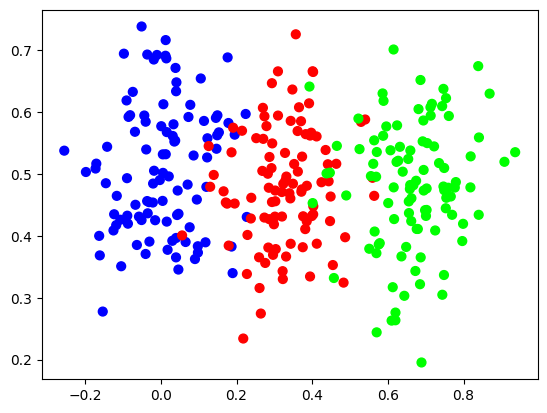

In [710]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()

X, y = vertical_data(100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap="brg")
plt.show()

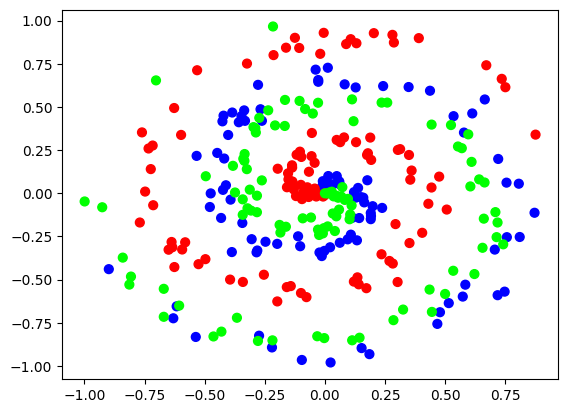

In [711]:
Xs, ys = spiral_data(100, classes=3)
plt.scatter(Xs[:, 0], Xs[:, 1], c=y, s=40, cmap="brg")
plt.show()

In [712]:
class LayerDense9:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        return self.output

In [713]:
class Relu9:

    def forward(self, x):
        self.output = np.maximum(0, x)
        return self.output

In [714]:
class ActivationSoftmax9:

    def forward(self, x):
        max_vals = np.max(x, axis=-1, keepdims=True)
        sub_vals = x - max_vals
        exp_vals = np.exp(sub_vals)
        self.output = exp_vals / np.sum(exp_vals, axis=-1, keepdims=True)
        return self.output

In [715]:
class Loss9:
    
    def calculate(self, output, y):
        sample_loss = self.forward(output, y)
        data_loss = np.mean(sample_loss)
        return data_loss

In [716]:
class CrossEntropy9(Loss9):
    
    def forward(self, y_preds, y_true):
        samples = len(y_preds)
        y_preds_clipped = np.clip(y_preds, 1e-7, 1 - 1e-7)
        if len(y_true.shape) == 1:
            correct_confidence = y_preds_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidence = np.sum(y_preds_clipped * y_true, axis=-1)
        
        negative_loglikelyhood = - np.log(correct_confidence)
        return negative_loglikelyhood

In [717]:
dense1 = LayerDense9(2, 3)
activation1 = Relu9()
dense2 = LayerDense9(3, 3)
activation2 = ActivationSoftmax9()
loss_function = CrossEntropy9()

In [718]:
lowest_loss = 999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

## Strategy 1: select weights and biases randomly -> resulting in no optimization

In [719]:
for iteration in range(100):
    dense1.weights = 0.05 * np.random.randn(2, 3)
    dense1.biases = 0.05 * np.random.randn(1, 3)
    dense2.weights = 0.05 * np.random.randn(3, 3)
    dense2.biases = 0.05 * np.random.randn(1, 3)

    output1 = dense1.forward(X)
    act1 = activation1.forward(output1)
    output2 = dense2.forward(act1)
    act2 = activation2.forward(output2)
    loss = loss_function.calculate(act2, y)

    predictions = np.argmax(act2, axis=-1)
    accuracy = np.mean(predictions == y)

    if loss < lowest_loss:
        print("Iteration:", iteration, "Loss:", loss, "Accuracy:", accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss

Iteration: 0 Loss: 1.0990946 Accuracy: 0.3333333333333333
Iteration: 2 Loss: 1.0987197 Accuracy: 0.3333333333333333
Iteration: 14 Loss: 1.0985042 Accuracy: 0.3333333333333333
Iteration: 29 Loss: 1.098088 Accuracy: 0.3333333333333333
Iteration: 66 Loss: 1.0979891 Accuracy: 0.3333333333333333
Iteration: 89 Loss: 1.0978057 Accuracy: 0.3333333333333333


In [720]:
dense1 = LayerDense9(2, 3)
activation1 = Relu9()
dense2 = LayerDense9(3, 3)
activation2 = ActivationSoftmax9()
loss_function = CrossEntropy9()

In [721]:
lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

## Strategy 2: adjust weigts and biases randomly -> working fine for vertical dataset but does not work for spiral dataset (lacks robustness)

In [722]:
for iteration in range(100):
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)

    output1 = dense1.forward(Xs)
    act1 = activation1.forward(output1)
    output2 = dense2.forward(act1)
    act2 = activation2.forward(output2)
    loss = loss_function.calculate(act2, ys)

    predictions = np.argmax(act2, axis=-1)
    accuracy = np.mean(predictions == ys)

    if loss < lowest_loss:
        print("Iteration:", iteration, "Loss:", loss, "Accuracy:", accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

Iteration: 0 Loss: 1.0988183 Accuracy: 0.3333333333333333
Iteration: 5 Loss: 1.0987344 Accuracy: 0.3333333333333333
Iteration: 6 Loss: 1.098645 Accuracy: 0.3333333333333333
Iteration: 7 Loss: 1.0979763 Accuracy: 0.33666666666666667
Iteration: 18 Loss: 1.0979431 Accuracy: 0.3333333333333333
Iteration: 21 Loss: 1.0971193 Accuracy: 0.34
Iteration: 24 Loss: 1.0970203 Accuracy: 0.3333333333333333
Iteration: 25 Loss: 1.0970019 Accuracy: 0.33666666666666667
Iteration: 31 Loss: 1.0967329 Accuracy: 0.3333333333333333
Iteration: 36 Loss: 1.0957471 Accuracy: 0.41333333333333333
Iteration: 41 Loss: 1.0950627 Accuracy: 0.3566666666666667
Iteration: 53 Loss: 1.093493 Accuracy: 0.34
Iteration: 65 Loss: 1.0931746 Accuracy: 0.38
Iteration: 70 Loss: 1.0931547 Accuracy: 0.35333333333333333
Iteration: 72 Loss: 1.0922836 Accuracy: 0.3933333333333333
Iteration: 73 Loss: 1.0908744 Accuracy: 0.35333333333333333
Iteration: 74 Loss: 1.0902166 Accuracy: 0.39
Iteration: 78 Loss: 1.0900012 Accuracy: 0.36
Iteration

# L 10 Derivaties, Partial Derivaties and Gradient in NNWs

### Derivate to find the slop of the tangent at a specific point

### Partial Derivate to find the slop of the tangent at a specific point along a specific axis

### Gradient is a matrix with all partial derivates stacked

# L 11 Chain Rule

## y = f( g ( x ) ) ---> dy / dx = f' * g'

# L 12 Backpropagation Neuron

In [723]:
inputs = np.array([1., -2., 3.])
weights = np.array([-3., -1., 2.])
bias = 1
target_output = 0.0
learning_rate = 0.001

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 1, 1.0, 0.0)

for iteration in range(20):
    linear_output = np.dot(weights, inputs) + bias
    output = relu(linear_output)
    loss = (output - target_output) ** 2

    dloss_doutput = 2 * (output - target_output)
    doutput_dlinear = relu_derivative(linear_output)
    dlinear_dweights = inputs
    dlinear_dbias = 1.0

    dloss_dlinear = dloss_doutput * doutput_dlinear
    dloss_dweights = dloss_dlinear * dlinear_dweights
    dloss_dbias = dloss_dlinear * dlinear_dbias

    weights -= learning_rate * dloss_dweights
    bias -= learning_rate * dloss_dbias

    print(f"Iteration {iteration + 1}, Loss: {loss}")

print("Final weights:", weights)
print("Final bias:", bias)

Iteration 1, Loss: 36.0
Iteration 2, Loss: 33.872397424621624
Iteration 3, Loss: 31.87054345809546
Iteration 4, Loss: 29.98699091998773
Iteration 5, Loss: 28.214761511794592
Iteration 6, Loss: 26.54726775906168
Iteration 7, Loss: 24.978326552541866
Iteration 8, Loss: 23.5021050739742
Iteration 9, Loss: 22.11313179151597
Iteration 10, Loss: 20.806246424284897
Iteration 11, Loss: 19.576596334671486
Iteration 12, Loss: 18.41961908608719
Iteration 13, Loss: 17.33101994032309
Iteration 14, Loss: 16.306757070164853
Iteration 15, Loss: 15.343027506224132
Iteration 16, Loss: 14.436253786815284
Iteration 17, Loss: 13.583071280700132
Iteration 18, Loss: 12.780312744165439
Iteration 19, Loss: 12.024995767388878
Iteration 20, Loss: 11.314319082257104
Final weights: [-3.18248226 -0.63503547  1.45255321]
Final bias: 0.8175177371478247


# L 13 Backpropagation Layer

In [724]:
inputs = np.array([[1, 2, 3, 4]])

weights = np.array([[0.1, 0.2, 0.3, 0.4],
                    [0.5, 0.6, 0.7, 0.8],
                    [0.9, 1.0, 1.1, 1.2]])

biases = np.array([[0.1, 0.2, 0.3]])

learning_rate = 0.001


def relu(x):
    return np.maximum(0, x)


def relu_derivative(x):
    return np.where(x > 0, 1, 0)


for iteration in range(200):
    # Forward Pass
    z = np.dot(inputs, weights.T) + biases
    a = relu(z)
    y = np.sum(a)

    loss = y ** 2

    # Backward Pass
    dL_dy = 2 * y

    dy_da = np.ones_like(a)
    dL_da = dL_dy * dy_da

    da_dz = relu_derivative(z)
    dL_dz = dL_da * da_dz

    dL_dW = np.outer(dL_dz, inputs)
    dL_db = dL_dz

    weights -= learning_rate * dL_dW
    biases -= learning_rate * dL_db

    if iteration % 20 == 0:
        print(f"Iteration {iteration}, Loss: {loss}")

print("Final weights:\n", weights)
print("Final biases:\n", biases)


Iteration 0, Loss: 466.56000000000006
Iteration 20, Loss: 5.329595763793193
Iteration 40, Loss: 0.41191524253483786
Iteration 60, Loss: 0.03183621475376345
Iteration 80, Loss: 0.002460565405431671
Iteration 100, Loss: 0.0001901729121621426
Iteration 120, Loss: 1.4698120139337557e-05
Iteration 140, Loss: 1.1359948840900371e-06
Iteration 160, Loss: 8.779778427447647e-08
Iteration 180, Loss: 6.785903626216421e-09
Final weights:
 [[-0.00698895 -0.0139779  -0.02096685 -0.0279558 ]
 [ 0.25975286  0.11950571 -0.02074143 -0.16098857]
 [ 0.53548461  0.27096922  0.00645383 -0.25806156]]
Final biases:
 [[-0.00698895 -0.04024714 -0.06451539]]


# L 14 Matrices in Backpropagation

## for batches of input, find the partial derivative of the loss with respect to the weights

## x.T * dL_dz

# L 15 Input derivatives in Backpropagation

## for batches of input, find the partial drivative of the loss with respect to the input dimensions

## dL_dz * weights.T

# L 16 Backpropagation Building Blocks

## partial derivatives of loss with respect to the weights

In [725]:
d_values = np.array([[1, 1, 1],
                     [2, 2, 2],
                     [3, 3, 3]])

inputs = np.array([[1, 2, 3, 2.5],
                   [2, 5, -1, 2],
                   [-1.5, 2.7, 3.3, -0.8]])


d_weights = np.dot(inputs.T, d_values)

print(f"X transposed shape:\n{inputs.T.shape}\ndL_dz Matrix shape:\n{d_values.shape}\n")
print(f"dL_dw:\n{d_weights}\ndL_dw Matrix shape: {d_weights.shape}")


X transposed shape:
(4, 3)
dL_dz Matrix shape:
(3, 3)

dL_dw:
[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]
dL_dw Matrix shape: (4, 3)


## partial derivatives of loss with respect to the biases

In [726]:
d_values = np.array([[1, 1, 1],
                     [2, 2, 2],
                     [3, 3, 3]])

biases = np.sum(d_values, axis=0, keepdims=True)
print(f"{biases}\n{biases.shape}")

[[6 6 6]]
(1, 3)


## partial derivatives of loss with respect to the inputs

In [727]:
d_values = np.array([[1, 1, 1],
                     [2, 2, 2],
                     [3, 3, 3]])

weights = np.array([[0.2, 0.5, -0.26],
                    [0.8, -0.91, -0.27],
                    [-0.5, 0.26, 0.17],
                    [1, -0.5, 0.87]])

dinputs = np.dot(d_values, weights.T)

print(f"dL_dx:\n{dinputs}")

dL_dx:
[[ 0.44 -0.38 -0.07  1.37]
 [ 0.88 -0.76 -0.14  2.74]
 [ 1.32 -1.14 -0.21  4.11]]


## adding backward method to the layer dense class

In [728]:
import torch 
from torch import nn

class LayerDense16:
    def __init__(self, in_dim, out_dim):
        self.weights = 0.01 * np.random.randn(in_dim, out_dim)
        self.biases = np.zeros((1, out_dim))
    
    def forward(self, x):
        self.input = x
        self.output = np.dot(x, self.weights) + self.biases
        return self.output
    
    def backward(self, d_values):
        self.dweights = np.dot(self.input.T, d_values)
        self.dbiases = np.sum(d_values, axis=0, keepdims=True)
        self.dinputs = np.dot(d_values, self.dweights.T)
        return self.dinputs

X, y = spiral_data(samples=100, classes=3)
dense16 = LayerDense16(2, 3)
d_values = (dense16.forward(X))
dense16.backward(d_values)

print(d_values.shape)


(300, 3)


# L 17 Backpropagation on RELU Activation Function

## implemented backward method in relu class

In [729]:
class Relu17:

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)
        return self.output
    
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0  

# L 18 Categorail Cross Entropy Loss

In [730]:
test_vals = np.array([[1, 2, 3, 4],
                      [2, 3, 4, 5],
                      [3, 4, 5, 6]])

samples = len(test_vals)
labels = len(test_vals[0])

print(samples)
print(labels)

3
4


In [731]:
class Loss18:
    
    def calculate(self, output, y):
        sample_loss = self.forward(output, y)
        data_loss = np.mean(sample_loss)
        return data_loss

In [732]:
class CrossEntropy18(Loss18):
    
    def forward(self, y_preds, y_true):
        samples = len(y_preds)
        y_preds_clipped = np.clip(y_preds, 1e-7, 1 - 1e-7)
        if len(y_true.shape) == 1:
            correct_confidence = y_preds_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidence = np.sum(y_preds_clipped * y_true, axis=-1)
        
        negative_loglikelyhood = - np.log(correct_confidence)
        return negative_loglikelyhood
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
            self.dinputs = -y_true / dvalues
            self.dinputs = self.dinputs / samples

# L 19 Combined Backpropagation Loss Function X Softmax

In [733]:
class ActivationSoftmax19:

    def forward(self, x):
        max_vals = np.max(x, axis=-1, keepdims=True)
        sub_vals = x - max_vals
        exp_vals = np.exp(sub_vals)
        self.output = exp_vals / np.sum(exp_vals, axis=-1, keepdims=True)
        return self.output

In [734]:
class ActivationSoftmaxLossCategorialCrossEntropy:
    def __init__(self):
        self.activation = ActivationSoftmax9()
        self.loss = CrossEntropy18()

    def forward(self, inputs, y_true):
        self.activation.forward(inputs)
        self.output = self.activation.output
        return self.loss.calculate(self.output, y_true)
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        self.dinputs = dvalues.copy()
        self.dinputs[range(samples), y_true] -= 1
        self.dinputs = self.dinputs / samples

In [735]:
softmax_op = np.array([[0.7, 0.1, 0.2],
                       [0.1, 0.5, 0.4],
                       [0.02, 0.9, 0.08]])

class_targets = np.array([0, 1, 1])
softmax_loss = ActivationSoftmaxLossCategorialCrossEntropy()
softmax_loss.backward(softmax_op, class_targets)
dvalues1 = softmax_loss.dinputs

print("Gradients: combined loss and activation:")
print(dvalues1)
print(dvalues1.shape)

Gradients: combined loss and activation:
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]
(3, 3)


# L 20 Assemble all Backprop Building Blocks

## overview of the building blocks

# L 21 NN Forward Backward Pass

In [736]:
class LayerDense21:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
        return self.output

    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)

In [737]:
class Loss21:

    def calculate(self, output, y):
        sample_loss = self.forward(output, y)
        data_loss = np.mean(sample_loss)
        return data_loss

In [738]:
class CategorialCrossEntropy21(Loss21):

    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

        negative_log_likelyhoods = -np.log(correct_confidences)
        return negative_log_likelyhoods
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])

        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples

In [739]:
class ActivationSoftmax21:

    def forward(self, inputs):
        max_vals = np.max(inputs, axis=1, keepdims=True)
        sub_vals = inputs - max_vals
        exp_vals = np.exp(sub_vals)
        self.outputs = exp_vals / np.sum(exp_vals, axis=1, keepdims=True)
        return self.outputs

In [740]:
class ActivationRelu21:

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)
        return self.output
    
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

In [741]:
class ActivationSoftmaxLossCategorialCrossEntropy21:
    def __init__(self):
        self.activation = ActivationSoftmax21()
        self.loss = CategorialCrossEntropy21()

    def forward(self, inputs, y_true):
        self.activation.forward(inputs)
        self.output = self.activation.outputs
        return self.loss.calculate(self.output, y_true)
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        self.dinputs = dvalues.copy()
        self.dinputs[range(samples), y_true] -= 1
        self.dinputs = self.dinputs / samples
        

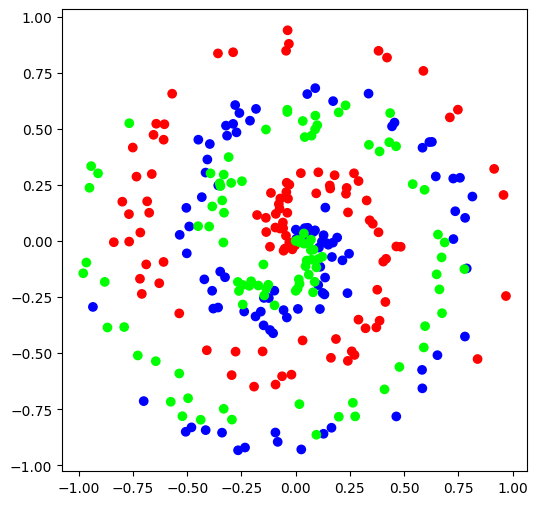

In [742]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()
import matplotlib.pyplot as plt

X, y = spiral_data(samples=100, classes=3)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
plt.show()

In [743]:
dense1 = LayerDense21(2, 3)
activation1 = ActivationRelu21()
dense2 = LayerDense21(3, 3)
loss_activation = ActivationSoftmaxLossCategorialCrossEntropy21()

out_dense1 = dense1.forward(X)
out_activation1 = activation1.forward(out_dense1)
out_dense2 = dense2.forward(out_activation1)
loss = loss_activation.forward(out_dense2, y)

print(loss_activation.output[:7])
print(f"loss: {loss}")
predictions = np.argmax(loss_activation.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions == y)
print(f"acc: {accuracy}")

loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

print(dense1.dweights)
print(dense1.dbiases)
print(dense2.dweights)
print(dense2.dbiases)

[[0.33333334 0.33333334 0.33333334]
 [0.33333316 0.3333332  0.33333364]
 [0.33333287 0.3333329  0.33333418]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]
 [0.33333284 0.33333287 0.3333343 ]
 [0.33333182 0.3333319  0.33333626]]
loss: 1.0986104011535645
acc: 0.34
[[ 1.5766358e-04  7.8368575e-05  4.7324404e-05]
 [ 1.8161036e-04  1.1045571e-05 -3.3096316e-05]]
[[-3.6055347e-04  9.6611722e-05 -1.0367142e-04]]
[[ 5.4410957e-05  1.0741142e-04 -1.6182236e-04]
 [-4.0791339e-05 -7.1678100e-05  1.1246944e-04]
 [-5.3011299e-05  8.5817286e-05 -3.2805994e-05]]
[[-1.0732794e-05 -9.4590941e-06  2.0027626e-05]]


# L 22 Optimizers in Neural Networks: Gradient Descent

In [744]:
class optimizerSGDFixedLR:
    def __init__(self, learning_rate=1):
        self.learning_rate = learning_rate
    
    def update_parameters(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases

### dweights and dbiases come from the backward method from the layer dense class

In [745]:
X, y = spiral_data(samples=100, classes=3)

dense1 = LayerDense21(2, 64)

activation1 = ActivationRelu21()

dense2 = LayerDense21(64, 3)

loss_activation = ActivationSoftmaxLossCategorialCrossEntropy21()

optimizer = optimizerSGDFixedLR()

for epoch in range(10001):
    dense1_out = dense1.forward(X)

    act1_out = activation1.forward(dense1_out)

    dense2_out = dense2.forward(act1_out)

    loss = loss_activation.forward(dense2_out, y)

    predictions = np.argmax(loss_activation.output, axis=1)

    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if epoch % 1000 == 0:
        print(f"epoch: {epoch}, acc: {accuracy:.3f}, loss: {loss:.3f}")
    
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.update_parameters(dense1)
    optimizer.update_parameters(dense2)

epoch: 0, acc: 0.347, loss: 1.099
epoch: 1000, acc: 0.450, loss: 1.018
epoch: 2000, acc: 0.460, loss: 0.954
epoch: 3000, acc: 0.593, loss: 0.846
epoch: 4000, acc: 0.637, loss: 0.803
epoch: 5000, acc: 0.710, loss: 0.645
epoch: 6000, acc: 0.690, loss: 0.664
epoch: 7000, acc: 0.747, loss: 0.566
epoch: 8000, acc: 0.757, loss: 0.525
epoch: 9000, acc: 0.790, loss: 0.515
epoch: 10000, acc: 0.793, loss: 0.499


# L 23 Learning Rate Decay in Neural Network Optimization

## use a large step size for exploration of the whole landscape of the loss function (Exploration Mode) 
## once the global minima is located the step size may be reduced enter (Exploitation Mode)

## parameter of learning rate decay controlls how fast the step size is decreasing

### not to be decreased at a too fast pace as this might cause getting stuck in local minima
### decay generally kept around 0.001

In [746]:
class OptimizerSGDVariableLR:
    def __init__(self, learning_rate=1., decay=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0

    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
    
    def update_parameters(self, layer):
        layer.weights += -self.current_learning_rate * layer.dweights
        layer.biases += -self.current_learning_rate * layer.dbiases

    def post_update_parameters(self):
        self.iterations += 1

In [747]:
X, y = spiral_data(samples=100, classes=3)

dense1 = LayerDense21(2, 64)
activation1 = ActivationRelu21()
dense2 = LayerDense21(64, 3)
loss_activation = ActivationSoftmaxLossCategorialCrossEntropy21()

optimizer = OptimizerSGDVariableLR(decay=0.00005)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    predictions = np.argmax(loss_activation.output, axis=1)

    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if epoch % 1000 == 0:
        print(f"epoch: {epoch}, acc: {accuracy:.3f}, loss: {loss:.3f}, lr: {optimizer.current_learning_rate}")

    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_parameters()
    optimizer.update_parameters(dense1)
    optimizer.update_parameters(dense2)
    optimizer.post_update_parameters()

epoch: 0, acc: 0.367, loss: 1.099, lr: 1.0
epoch: 1000, acc: 0.470, loss: 1.028, lr: 0.9524263060145722
epoch: 2000, acc: 0.467, loss: 0.968, lr: 0.909132233283331
epoch: 3000, acc: 0.520, loss: 0.914, lr: 0.8696030262185312
epoch: 4000, acc: 0.620, loss: 0.788, lr: 0.833368057002375
epoch: 5000, acc: 0.700, loss: 0.689, lr: 0.8000320012800511
epoch: 6000, acc: 0.750, loss: 0.589, lr: 0.769260356167545
epoch: 7000, acc: 0.773, loss: 0.535, lr: 0.7407681765991333
epoch: 8000, acc: 0.627, loss: 1.021, lr: 0.7143112254009072
epoch: 9000, acc: 0.767, loss: 0.562, lr: 0.689678954446705
epoch: 10000, acc: 0.807, loss: 0.479, lr: 0.6666888896296542


# L 24 Momentum in training Neural Networks

### Momentum uses the previous update directions in order to influence the next update

### Momentum reduces the oscillation which gradient descent can produce

### Momentum expands the weight update formula by adding a fixed Momentum Factor multiplied by the previous weight updates

### with increase of the momentum factor the past weight updates will have a larger impact on the new weight update, factor ranging from 0 to 1

### using Momentum is adding a term that corresponds to the direction of the previous changes

In [748]:
class OptimizerSGD_M:
    def __init__(self, learning_rate=0.5, decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum
    
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
    
    def update_parameters(self, layer):
        if self.momentum:
            if not hasattr(layer, "weight_momentums"):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)
            
            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates
        
        else:
            weight_updates += -self.current_learning_rate * layer.dweights
            bias_updates += -self.current_learning_rate * layer.dbiases
        
        layer.weights += weight_updates
        layer.biases += bias_updates
    
    def post_update_parameters(self):
        self.iterations += 1

In [749]:
X, y = spiral_data(samples=100, classes=3)

dense1 = LayerDense21(2, 64)
activation1 = ActivationRelu21()
dense2 = LayerDense21(64, 3)
loss_activation = ActivationSoftmaxLossCategorialCrossEntropy21()
optimizer = OptimizerSGD_M(decay=1e-3, momentum=0.9)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)
    predictions = np.argmax(loss_activation.output, axis=1)

    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if epoch % 1000 == 0:
        print(f"epoch: {epoch}, acc: {accuracy:.3f}, loss: {loss:.3f}, lr: {optimizer.current_learning_rate}")
    
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_parameters()
    optimizer.update_parameters(dense1)
    optimizer.update_parameters(dense2)
    optimizer.post_update_parameters()
    

epoch: 0, acc: 0.350, loss: 1.099, lr: 0.5
epoch: 1000, acc: 0.673, loss: 0.709, lr: 0.2501250625312656
epoch: 2000, acc: 0.807, loss: 0.475, lr: 0.16672224074691563
epoch: 3000, acc: 0.847, loss: 0.344, lr: 0.12503125781445362
epoch: 4000, acc: 0.903, loss: 0.266, lr: 0.10002000400080015
epoch: 5000, acc: 0.917, loss: 0.230, lr: 0.08334722453742291
epoch: 6000, acc: 0.933, loss: 0.207, lr: 0.0714387769681383
epoch: 7000, acc: 0.937, loss: 0.191, lr: 0.06250781347668458
epoch: 8000, acc: 0.940, loss: 0.182, lr: 0.055561729081008995
epoch: 9000, acc: 0.940, loss: 0.176, lr: 0.05000500050005
epoch: 10000, acc: 0.937, loss: 0.172, lr: 0.045458678061641965


# L 25 ADAGRAD Optimizer

### all parameters can have different learning rates

### updating all weights at the same scale regardless of how large or how small or how they differ from each other 

### depending on the weight the learning rate should be able to be adjusted hence is the value of the weight small the learning rate should increase and if the value of the weight is high the learning rate should decrease 

### storing a history of the gradient values which have been computed during backpropagation

### cache --> accumulated square gradient up to the point, used to balance out the learning rate for gradient values which are different in size, learning rate times gradient divided by square root of cache + epsilon (hyperparameter to prevent from division through zero)

### drawback to adagrad, cache value is continously increasing as number of iterations increases, the higher the number of iterations the higher the cache value that causes very high values in the denominator of the respective part of the gradient update formula which leads to a very low value being subtracted from the old gradient, this might be the cause of stagnation in learning as the value of the old gradient does not change by a considerable amount

In [750]:
class OptimizerAdagrad:
    def __init__(self, learning_rate=0.5, decay=0., epsilon=1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
    
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
    
    def update_parameters(self, layer):
        if not hasattr(layer, "weight_cache"):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        layer.weight_cache += layer.dweights**2
        layer.bias_cache += layer.dbiases**2

        layer.weights += -self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)
    
    def post_update_parameters(self):
        self.iterations += 1

In [751]:
X, y = spiral_data(samples=100, classes=3)

dense1 = LayerDense21(2, 64)
activation1 = ActivationRelu21()
dense2 = LayerDense21(64, 3)
loss_activation = ActivationSoftmaxLossCategorialCrossEntropy21()

optimizer = OptimizerAdagrad(decay=1e-4)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)

    if epoch % 1000 == 0:
        print(f"epoch: {epoch}, acc: {accuracy:.3f}, loss: {loss:.3f}, lr: {optimizer.current_learning_rate}")
    
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_parameters()
    optimizer.update_parameters(dense1)
    optimizer.update_parameters(dense2)
    optimizer.post_update_parameters()
    

epoch: 0, acc: 0.340, loss: 1.099, lr: 0.5
epoch: 1000, acc: 0.633, loss: 0.716, lr: 0.4545867806164196
epoch: 2000, acc: 0.707, loss: 0.609, lr: 0.4167013917826486
epoch: 3000, acc: 0.767, loss: 0.522, lr: 0.3846449726902069
epoch: 4000, acc: 0.777, loss: 0.494, lr: 0.35716836916922634
epoch: 5000, acc: 0.787, loss: 0.474, lr: 0.3333555570371358
epoch: 6000, acc: 0.780, loss: 0.458, lr: 0.31251953247077946
epoch: 7000, acc: 0.783, loss: 0.445, lr: 0.2941349491146538
epoch: 8000, acc: 0.790, loss: 0.435, lr: 0.27779321073392965
epoch: 9000, acc: 0.797, loss: 0.427, lr: 0.26317174588136216
epoch: 10000, acc: 0.800, loss: 0.421, lr: 0.2500125006250313


# L 26 RMSProp Optimizer

## Root Mea Squared Propagation

## RMSProp combines Momentum with Adagrad

### Adagrad -> cache = cache + gradient^2
### RMSProp -> cache = rho*cache + (1 - rho) * gradient^2

## rho -> cache memory decay rate

### in RMSProp the cache value accumulates slower leading to a much slower increase in the demonominator when the new gradient is computed preventing stagnation of learning

In [752]:
class OptimizerRMSProp:
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.rho = rho
    
    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. + (1. * self.decay * self.iterations))
    
    def update_parameters(self, layer):
        if not hasattr(layer, "weight_cache"):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        layer.weight_cache = self.rho * layer.weight_cache + (1 - self.rho) * layer.dweights**2
        layer.bias_cache = self.rho * layer.bias_cache + (1 - self.rho) * layer.dbiases**2

        layer.weights += -self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)
    
    def post_update_parameters(self):
        self.iterations += 1

In [753]:
X, y = spiral_data(samples=100, classes=3)

dense1 = LayerDense21(2, 64)
activation1 = ActivationRelu21()
dense2 = LayerDense21(64, 3)
loss_activation = ActivationSoftmaxLossCategorialCrossEntropy21()

optimizer = OptimizerRMSProp(learning_rate=0.02, decay=1e-5, rho=0.999)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)

    if epoch % 1000 == 0:
        print(f"epoch: {epoch}, acc: {accuracy:.3f}, loss: {loss:.3f} lr: {optimizer.current_learning_rate:.3f}")

    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_parameters()
    optimizer.update_parameters(dense1)
    optimizer.update_parameters(dense2)
    optimizer.post_update_parameters()

epoch: 0, acc: 0.317, loss: 1.099 lr: 0.020
epoch: 1000, acc: 0.603, loss: 0.785 lr: 0.020
epoch: 2000, acc: 0.670, loss: 0.687 lr: 0.020
epoch: 3000, acc: 0.717, loss: 0.627 lr: 0.021
epoch: 4000, acc: 0.730, loss: 0.604 lr: 0.021
epoch: 5000, acc: 0.707, loss: 0.586 lr: 0.021
epoch: 6000, acc: 0.733, loss: 0.552 lr: 0.021
epoch: 7000, acc: 0.737, loss: 0.516 lr: 0.021
epoch: 8000, acc: 0.757, loss: 0.522 lr: 0.022
epoch: 9000, acc: 0.737, loss: 0.508 lr: 0.022
epoch: 10000, acc: 0.773, loss: 0.487 lr: 0.022


### as iteration increase up to 1 Million the improve in performance of the RMSProp compared to the Adagrad optimizer become more profound

# L 27 Adam Optimizer

### using momentum for past gradients and cache term introduced with RMSProp for adaptive learning rate

### iterations + 1 as self.iterations is 0 at the start and is needed to be 1

In [754]:
class OptimizerAdam:
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta1=0.9, beta2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta1 = beta1
        self.beta2 = beta2

    def pre_update_parameters(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    def update_parameters(self, layer):
        if not hasattr(layer, "weight_cache"):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        layer.weight_momentums = self.beta1 * layer.weight_momentums + (1 - self.beta1) * layer.dweights
        layer.bias_momentums = self.beta1 * layer.bias_momentums + (1 - self.beta1) * layer.dbiases

        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta1 ** (self.iterations + 1))

        layer.weight_cache = self.beta2 * layer.weight_cache + (1 - self.beta2) * layer.dweights**2
        layer.bias_cache = self.beta2 * layer.bias_cache + (1 - self.beta2) * layer.dbiases**2

        weight_cache_corrected = layer.weight_cache / (1 - self.beta2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta2 ** (self.iterations + 1))

        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    def post_update_parameters(self):
        self.iterations += 1

In [755]:
X, y = spiral_data(samples=100, classes=3)

dense1 = LayerDense21(2, 64)
activation1 = ActivationRelu21()
dense2 = LayerDense21(64, 3)
loss_activation = ActivationSoftmaxLossCategorialCrossEntropy21()

optimizer = OptimizerAdam(learning_rate=0.02, decay=1e-5)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)

    if epoch % 1000 == 0:
        print(f"epoch: {epoch}, acc: {accuracy:.3f}, loss: {loss:.3f}, lr: {optimizer.current_learning_rate:.7f}")

    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_parameters()
    optimizer.update_parameters(dense1)
    optimizer.update_parameters(dense2)
    optimizer.post_update_parameters()

epoch: 0, acc: 0.370, loss: 1.099, lr: 0.0200000
epoch: 1000, acc: 0.840, loss: 0.444, lr: 0.0198022
epoch: 2000, acc: 0.837, loss: 0.371, lr: 0.0196080
epoch: 3000, acc: 0.887, loss: 0.328, lr: 0.0194177
epoch: 4000, acc: 0.873, loss: 0.309, lr: 0.0192310
epoch: 5000, acc: 0.897, loss: 0.288, lr: 0.0190478
epoch: 6000, acc: 0.900, loss: 0.277, lr: 0.0188681
epoch: 7000, acc: 0.893, loss: 0.270, lr: 0.0186918
epoch: 8000, acc: 0.907, loss: 0.259, lr: 0.0185187
epoch: 9000, acc: 0.917, loss: 0.253, lr: 0.0183488
epoch: 10000, acc: 0.917, loss: 0.245, lr: 0.0181820


# L 28 Testing Out of Sample Data

### draw attention on the generalization performance 

### good generalization vs poor generalization

### nns performing poorly in terms of generalizing when the testing data is memorized too well and potential noise is captured also (data points that are out of the way and mixed up with data points of a different class) --> overfitting

## accuracy on the training data does not have to be as high as possible, simpler models can do better in generalization 

In [756]:
X_test, y_test = spiral_data(samples=1000, classes=3)

# increased number of training data points
dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss = loss_activation.forward(dense2.output, y_test)

predictions = np.argmax(loss_activation.output, axis=1)
if len(y_test.shape) == 2:
    y_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions==y_test)
print(f"validation, acc: {accuracy:.3f}, loss: {loss:.3f}")

validation, acc: 0.788, loss: 0.686


## validation accuracy < training accuracy --> sign of overfitting

## things to do against overfitting

### --> check on model architecture (reduce model complexity)
### --> reduce number of epochs
### --> adjust learning rate
### --> adding dropout

## Job does not finish after training --> check performance on testing data and adjust hyperparameters
### hyperpramaters can be changed in order to adjust the model performance on testing data

# L 29 Testing vs Validation Data - Cross Validation

## hyperparameters do not change during the training process, to be set before the training starts and they remain constant throughout training (number of layers, number of neurons in each layer, activation functions, beta1, beta2, learning rate, number of epochs)

## testing hyper parameters on the validation dataset (used to finalize the hyperparameters of the neural network)

## difference between the sets 
## --> testing dataet: test neural network on new unseen data
## --> validation data: to optimize hyperparameters of neural network

### for large datasets a three-way-split can be performed --> train, validation and test data

### for smaller datsets a two-way-split may be performed

### K - fold cross validation splits the training set into subsets and per iteration one subset becomes the validation data and the remaining sets remain training --> for each validation set there is a validation error

### out of all iterations compute a mean validation error (add up and divide by the number of errors)

### find validation error for multiple sets of hyperparameters 

## Data Leakage -- there should be no intersection between testing and training data

# L 30 L1 and L2 regularization

## only used in training to prevent overfitting

In [757]:
class LayerDenseReg30:
    def __init__(self, n_inputs, n_neurons, 
                 weight_regularizerL1=0, weight_regularizerL2=0, 
                 bias_regularizerL1=0, bias_regularizerL2=0):
        
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

        self.weight_regularizerL1 = weight_regularizerL1
        self.weight_regularizerL2 = weight_regularizerL2
        self.bias_regularizerL1 = bias_regularizerL1
        self.bias_regularizerL2 = bias_regularizerL2
    
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
        return self.output
    
    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        if self.weight_regularizerL1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizerL1 * dL1
        
        if self.weight_regularizerL2 > 0:
            self.dweights += 2 * self.weight_regularizerL2 * self.weights
        
        if self.bias_regularizerL1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizerL1 * dL1
        
        if self.bias_regularizerL2 > 0:
            self.dbiases += 2 * self.bias_regularizerL2 * self.biases
        
        self.dinputs = np.dot(dvalues, self.weights.T)

In [758]:
class Loss30:
    def regularization_loss(self, layer):
        regularization_loss = 0

        if layer.weight_regularizerL1 > 0:
            regularization_loss += layer.weight_regularizerL1 * np.sum(np.abs(layer.weights))
        
        if layer.weight_regularizerL2 > 0:
            regularization_loss += layer.weight_regularizerL2 * np.sum(layer.weights**2)
        
        if layer.bias_regularizerL1 > 0:
            regularization_loss += layer.bias_regularizerL1 * np.sum(np.abs(layer.biases))
        
        if layer.bias_regularizerL2 > 0:
            regularization_loss += layer.bias_regularizerL2 * np.sum(layer.biases**2)
        
        return regularization_loss

    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

In [759]:
class CategorialCrossEntropy30(Loss30):

    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

        negative_log_likelyhoods = -np.log(correct_confidences)
        return negative_log_likelyhoods
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])

        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples

In [760]:
class ActivationSoftmax30:

    def forward(self, inputs):
        max_vals = np.max(inputs, axis=1, keepdims=True)
        sub_vals = inputs - max_vals
        exp_vals = np.exp(sub_vals)
        self.outputs = exp_vals / np.sum(exp_vals, axis=1, keepdims=True)
        return self.outputs

In [761]:
class ActivationRelu30:

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)
        return self.output
    
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

In [762]:
class ActivationSoftmaxLossCategorialCrossEntropy30:
    def __init__(self):
        self.activation = ActivationSoftmax30()
        self.loss = CategorialCrossEntropy30()

    def forward(self, inputs, y_true):
        self.activation.forward(inputs)
        self.output = self.activation.outputs
        return self.loss.calculate(self.output, y_true)
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        self.dinputs = dvalues.copy()
        self.dinputs[range(samples), y_true] -= 1
        self.dinputs = self.dinputs / samples

## comment and uncommend for the difference in results with regularization and without regularization

In [763]:
X, y = spiral_data(samples=100, classes=3)

#dense1 = LayerDenseReg30(2, 64)
dense1 = LayerDenseReg30(2, 64, weight_regularizerL2=5e-4, bias_regularizerL2=5e-4)
activation1 = ActivationRelu30()
dense2 = LayerDenseReg30(64, 3)
loss_activation = ActivationSoftmaxLossCategorialCrossEntropy30()

optimizer = OptimizerAdam(learning_rate=0.02, decay=5e-7)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)

    data_loss = loss_activation.forward(dense2.output, y)
    regularization_loss = loss_activation.loss.regularization_loss(dense1) + loss_activation.loss.regularization_loss(dense2)
    loss = data_loss + regularization_loss

    predictions = np.argmax(loss_activation.output, axis=1)

    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)

    if epoch % 1000 == 0:
        print(f"epoch: {epoch}, acc: {accuracy:.3f}, loss: {loss:.3f} (data loss: {data_loss:.3f}, reg loss: {regularization_loss:.3f}), lr: {learning_rate:.5f}")
    
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_parameters()
    optimizer.update_parameters(dense1)
    optimizer.update_parameters(dense2)
    optimizer.post_update_parameters()

epoch: 0, acc: 0.407, loss: 1.099 (data loss: 1.099, reg loss: 0.000), lr: 0.00100
epoch: 1000, acc: 0.873, loss: 0.561 (data loss: 0.470, reg loss: 0.091), lr: 0.00100
epoch: 2000, acc: 0.900, loss: 0.460 (data loss: 0.358, reg loss: 0.101), lr: 0.00100
epoch: 3000, acc: 0.907, loss: 0.416 (data loss: 0.318, reg loss: 0.099), lr: 0.00100
epoch: 4000, acc: 0.907, loss: 0.389 (data loss: 0.295, reg loss: 0.094), lr: 0.00100
epoch: 5000, acc: 0.903, loss: 0.366 (data loss: 0.277, reg loss: 0.089), lr: 0.00100
epoch: 6000, acc: 0.920, loss: 0.351 (data loss: 0.266, reg loss: 0.085), lr: 0.00100
epoch: 7000, acc: 0.920, loss: 0.338 (data loss: 0.257, reg loss: 0.081), lr: 0.00100
epoch: 8000, acc: 0.920, loss: 0.327 (data loss: 0.245, reg loss: 0.081), lr: 0.00100
epoch: 9000, acc: 0.903, loss: 0.322 (data loss: 0.243, reg loss: 0.079), lr: 0.00100
epoch: 10000, acc: 0.893, loss: 0.319 (data loss: 0.243, reg loss: 0.076), lr: 0.00100


In [764]:
X_test, y_test = spiral_data(samples=100, classes=3)

dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss = loss_activation.forward(dense2.output, y_test)

predictions = np.argmax(loss_activation.output, axis=1)
if len(y_test.shape) == 2:
    y_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions==y_test)
print(f"validation, acc: {accuracy:.3f}, loss: {loss:.3f}")

validation, acc: 0.833, loss: 0.558


# L 31 DropOut in Neural Networks

### randomly turn of neurons during forward pass
### coadaptation problem, neurons can adapt to neighboring neurons outputs

### initialize the Dropout Layer

In [768]:
class LayerDropout:
    def __init__(self, rate):
        self.rate = 1 - rate
    
    def forward(self, inputs):
        self.inputs = inputs
        self.binary_mask = np.random.binomial(1, self.rate, size=inputs.shape) / self.rate
        self.output = inputs * self.binary_mask
        return self.output

    def backward(self, dvalues):
        self.dinputs = dvalues * self.binary_mask

In [769]:
X, y = spiral_data(samples=1000, classes=3)

dense1 = LayerDenseReg30(2, 64, weight_regularizerL2=5e-4, bias_regularizerL2=5e-4)
activation1 = ActivationRelu30()

dropout1 = LayerDropout(0.1)

dense2 = LayerDenseReg30(64, 3)
loss_activation = ActivationSoftmaxLossCategorialCrossEntropy30()

optimizer = OptimizerAdam(learning_rate=0.05, decay=5e-5)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dropout1.forward(activation1.output)
    dense2.forward(dropout1.output)
    data_loss = loss_activation.forward(dense2.output, y)

    regularization_loss = loss_activation.loss.regularization_loss(dense1) + loss_activation.loss.regularization_loss(dense2)

    loss = data_loss + regularization_loss

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if epoch % 1000 == 0:
        print(f"epoch: {epoch}, acc: {accuracy:.3f}, loss: {loss:.3f}, data loss: {data_loss:.3f}, reg loss: {regularization_loss:.3f}, lr: {optimizer.current_learning_rate:.5f}")

    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    dropout1.backward(dense2.dinputs)
    activation1.backward(dropout1.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_parameters()
    optimizer.update_parameters(dense1)
    optimizer.update_parameters(dense2)
    optimizer.post_update_parameters()

epoch: 0, acc: 0.270, loss: 1.099, data loss: 1.099, reg loss: 0.000, lr: 0.05000
epoch: 1000, acc: 0.679, loss: 0.768, data loss: 0.739, reg loss: 0.029, lr: 0.04762
epoch: 2000, acc: 0.683, loss: 0.744, data loss: 0.720, reg loss: 0.024, lr: 0.04546
epoch: 3000, acc: 0.669, loss: 0.754, data loss: 0.732, reg loss: 0.022, lr: 0.04348
epoch: 4000, acc: 0.678, loss: 0.728, data loss: 0.708, reg loss: 0.021, lr: 0.04167
epoch: 5000, acc: 0.688, loss: 0.721, data loss: 0.702, reg loss: 0.019, lr: 0.04000
epoch: 6000, acc: 0.688, loss: 0.724, data loss: 0.705, reg loss: 0.019, lr: 0.03846
epoch: 7000, acc: 0.680, loss: 0.738, data loss: 0.720, reg loss: 0.018, lr: 0.03704
epoch: 8000, acc: 0.702, loss: 0.717, data loss: 0.700, reg loss: 0.018, lr: 0.03572
epoch: 9000, acc: 0.681, loss: 0.734, data loss: 0.718, reg loss: 0.017, lr: 0.03448
epoch: 10000, acc: 0.675, loss: 0.730, data loss: 0.714, reg loss: 0.016, lr: 0.03333


In [770]:
X_test, y_test = spiral_data(samples=1000, classes=3)

dense1.forward(X_test)
activation1.forward(dense1.output)
dropout1.forward(activation1.output)
dense2.forward(dropout1.output)
loss = loss_activation.forward(dense2.output, y_test)

predictions = np.argmax(loss_activation.output, axis=1)

if len(y_test.shape) == 2:
    y_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == y_test)

print(f"validation, acc: {accuracy:.3f}, loss: {loss:.3f}")

validation, acc: 0.676, loss: 0.710
